/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving data.csv to data.csv
[0]Logistics Regression Training Accuracy: 0.9906103286384976
[1]Decision Tree Classifier Training Accuracy: 1.0
[2]Random Forest Classifier Training Accuracy: 0.9953051643192489
Model 0
[[86  4]
 [ 3 50]]
Testing Accuracy= 0.951048951048951

Model 1
[[86  4]
 [ 3 50]]
Testing Accuracy= 0.951048951048951

Model 2
[[86  4]
 [ 3 50]]
Testing Accuracy= 0.951048951048951

Model  0
              precision    recall  f1-score   support

           B       0.97      0.96      0.96        90
           M       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951

Model  1
              precision    recall  f1-score   support

           B       0.98      0.92      0.95        90
           M       0.88      0.96      0.92        53

    accuracy                           0.94       143
   macro avg       

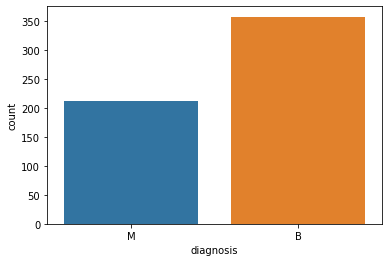

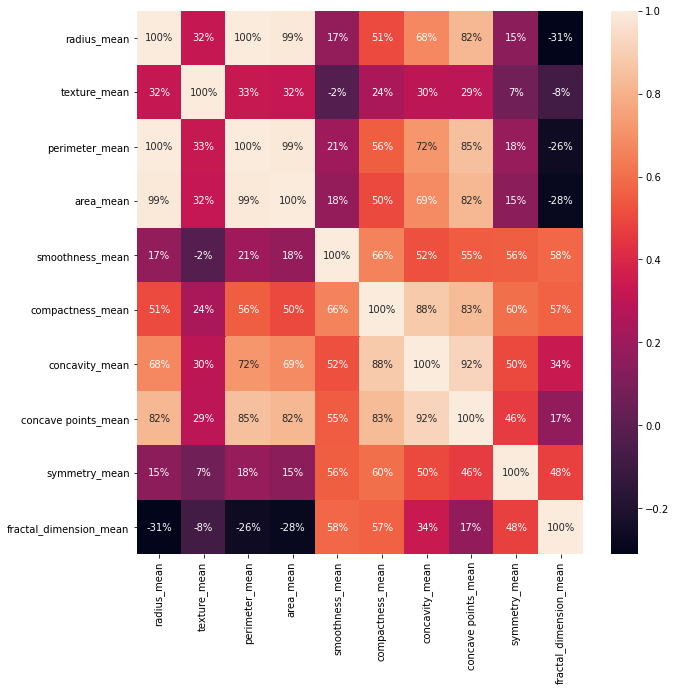

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Load the data to the colab
from google.colab import files
uploaded=files.upload()
df=pd.read_csv('data.csv')
df.head(7)
#Count the no of columns & rows dataset
df.shape
#count the no of empty value
df.isna().sum
#drop empty columns
df=df.dropna(axis=1)
#Get the new count of rows & columns
df.shape
#Get the columns of malignant(M) or Benign(B) Cells
df['diagnosis'].value_counts()
#Visualize the count
sns.countplot(df['diagnosis'],label='count')
#Look at the data types to see which columns needs to be encoded
df.dtypes
#print the first 5 rows of the new data
df.head(5)
#Encode the categorical data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
labelencoder_Y.fit_transform(df.iloc[:,1].values)
#df.iloc[:,1].values
#Get the Correlation of the column
df.iloc[:,1:12].corr()
#Visulazie the coorelation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(),annot=True,fmt='.0%')
#Split the data set inti independent (X) and Dependent (Y) data set, which will help in detemining the cancer cells
X=df.iloc[:,2:31].values
Y=df.iloc[:,1].values
#Split the data set into 75% training & 25% testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)
#Scale the data, Feature Scailing
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
#Create a function for the models:
def models(X_train,Y_train):
  #Logistic Regression
  from sklearn.linear_model import LogisticRegression 
  log=LogisticRegression(random_state=0)
  log.fit(X_train,Y_train)
  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
  tree.fit(X_train,Y_train)
  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
  forest.fit(X_train,Y_train)
  #Print the models accuracy on train data
  print('[0]Logistics Regression Training Accuracy:',log.score(X_train,Y_train))
  print('[1]Decision Tree Classifier Training Accuracy:',tree.score(X_train,Y_train))
  print('[2]Random Forest Classifier Training Accuracy:',forest.score(X_train,Y_train))
  return log,tree,forest
#Getting all of the models
model=models(X_train,Y_train)
#test model accuracy on confusion matrix
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  print('Model',i)
  cm = confusion_matrix(Y_test, model[0].predict(X_test))
  
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  print(cm)
  print('Testing Accuracy=',(TP + TN) / (TP + TN + FN + FP))
  print()# Print a new line

#show another way to get metrics of models
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(len(model)):
  print('Model ',i)
    #Check precision, recall, f1-score
  print( classification_report(Y_test, model[i].predict(X_test)) )
    #Another way to get the models accuracy on the test data
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()#Print a new line

    
#Print Prediction of Random Forest Classifier model
pred = model[2].predict(X_test)
print(pred)
#Print a space
print()
#Print the actual values
print(Y_test)
   